In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

,x,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,0
4,-0.234153,0


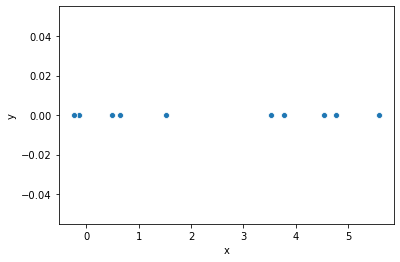

<IPython.core.display.Javascript object>

In [3]:
np.random.seed(42)
a = np.random.normal(0, 1, 5)
b = np.random.normal(4, 1, 5)

df = pd.DataFrame({"x": np.hstack((a, b))})
df["y"] = 0

display(df.head())

sns.scatterplot("x", "y", data=df)
plt.show()

* Choose `k` rows from the dataframe at random to be the initial centroids.
    * Note, that [other implementations](https://en.wikipedia.org/wiki/K-means%2B%2B) will do this a little more rigorously than `k` random points.
* Convert the centroids to a numpy array

In [4]:
k = 2

<IPython.core.display.Javascript object>

In [ ]:
centroids = 
centroids_np = ____
centroids

Here are where the centroids are located that we randomly selected

In [ ]:
sns.scatterplot("x", "y", data=df)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, c="black")
plt.show()

We want to build towards a for loop to assign each point to a centroid.  For this, we'll use the sum of the squared differences (formula below).

$$\sum_{i=0}^{n}{(x_i - y_i)^2}$$

* $n$ is the total number of features
* $i$ is the current feature index
* $x_i$ is the current feature value for observation $x$
* $y_i$ is the current feature value for observation $y$

The below code chunks have the beginnings of logic we'll use in a `for` loop to compute euclidean distance between each row and each centroid.

In [ ]:
X = np.array(df)

# create a variable named x
# put the first item from X in x
# this is to 'pretend' we're in the for loop
x = ____

In [ ]:
# Take difference between x and centroids
diffs = ____
diffs

In [ ]:
# Square the differences
sq_diffs = ____
sq_diffs

In [ ]:
# Sum the squared differences by row
dists = ____
dists

In [ ]:
# Find the index of the centroid closest to x
label = ____
label

In [ ]:
# Use all of the components you just made to build a for loop
# that assigns a label to each row of X
labels = []
for x in X:
    ____
    labels.append(label)

labels

Add the assigned labels as a column in the below dataframe named `assigned_df`.

In [ ]:
assigned_df = df.copy()
assigned_df["label"] = labels
assigned_df.head()

Replot the data with the points colored by cluster assignment

In [ ]:
sns.scatterplot("x", "y", hue="label", data=assigned_df)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
plt.show()

Aggregate `assigned_df` to update the centroids.
* Group by the `'label'` column and take the mean of every other column.
* Convert this output to a numpy array and assign it to `centroids`

In [ ]:
agg_df = ____
centroids = ____
centroids

Replot the data colored by `'label'` with the new centroids.

In [ ]:
sns.scatterplot("x", "y", hue="label", data=assigned_df)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
plt.show()

The process we've been doing is rewritten as functions below.  Take a minute to read over the functions and confirm you understand the logic.

In [ ]:
def init_centroids(df, k):
    centroids = df.sample(k).values
    return centroids

In [ ]:
def assign_centroids(X, centroids):
    X = np.array(X)
    centroids = np.array(centroids)

    labels = []
    for x in X:
        diffs = x - centroids
        sq_diffs = diffs ** 2
        dists = np.sum(sq_diffs, axis=1)
        label = dists.argmin()
        labels.append(label)

    return labels

In [ ]:
def update_centroids(assigned_df):
    centroid_agg = assigned_df.groupby("label").mean()
    centroids = centroid_agg.values
    return centroids

In [ ]:
def plot_kmeans(df, centroids):
    sns.scatterplot("x", "y", hue="label", data=df)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
    plt.show()

Use the functions to: 
1. Initialize centroids
* Assign points to centroids
* Plot the current step
* Update centroids

In [ ]:
# Initialize centroids
centroids = ____

# Assign points to centroids
labels = ____
assigned_df = df.copy()
assigned_df["label"] = ____

# Plot the current step
____

# Update centroids
centroids = ____

Write a for loop to perform the assigning, plotting, and updating `n` times.

In [ ]:
n = 4
centroids = init_centroids(df, 2)

In [ ]:
for _ in range(n):
    labels = assign_centroids(df, centroids)

    assigned_df = df.copy()
    assigned_df["label"] = labels

    plot_kmeans(assigned_df, centroids)
    centroids = update_centroids(assigned_df)

Boom! That's a bonified k-means algorithm.  For extra practice you might:
* Re-do the process with random `y` values instead of all 0s
    * The same code should work
* Re-do the process with a 3rd feature, `z`
    * The same code should work (i think), but the plotting will only show `x` and `y`
* Wrap the whole process up in a single function or class.  Feature requests below:
    * Give the user the option to turn plots on/off
    * Give the user the option to pass in a `random_state` that is used during centroid initialization
    * Give the user the option to specify a maximum number of iterations before the algorithm stops
    * Cause the algorithm to stop early if the centroids didn't change (i.e. it's converged)

Now let's do it the `sklearn` way.

In [ ]:
data_url = "https://docs.google.com/spreadsheets/d/1RJrLftlRnj6gmrYewqxykVKSyl7aV-Ktd3sUNQILidM/export?format=csv"
startup = pd.read_csv(data_url)
startup = startup.drop(columns="State")
startup.head()

* Create a scaled version of the data with `StandardScaler()`
* Initialize a `KMeans` instance with `k` clusters.
* `.fit()` it to the `scaled` data

In [ ]:
k = 4

In [ ]:
# Scale the data


In [ ]:
# Fit kmeans


* Unscale the `clst.cluster_centers_` using your `StandardScaler` instance.  We do this for interpretation purposes; it's much easier to translate the numbers back in their original dollars and cents values.
* Save the unscaled centroids to a dataframe with the same names as the `startup` dataframe

In [ ]:
centroids = ____
centroids_df = pd.DataFrame(centroids, columns=startup.columns)
centroids_df

* Interpret the output; try and give names to these clusters that represent their members
* Don't just look at the numbers; visualize the centroids somehow.  
    * A plot?
    * A formatted table?